In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 697 files belonging to 9 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 181 files belonging to 9 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 97.515625  76.365845  72.44208 ]
   [104.03125   85.80847   78.42578 ]
   [107.806335  91.21484   82.2829  ]
   ...
   [198.51453  178.32031  177.0971  ]
   [204.97467  174.00592  178.97845 ]
   [195.66217  176.32812  177.6211  ]]

  [[100.1604    79.060486  75.90045 ]
   [106.12964   89.15662   82.18359 ]
   [110.01068   93.9046    87.00287 ]
   ...
   [200.32544  177.20435  176.87378 ]
   [200.565    175.43713  178.14594 ]
   [197.04486  177.13885  177.21509 ]]

  [[102.72876   82.93585   77.34375 ]
   [108.79401   90.06085   85.73047 ]
   [114.22931   96.93707   93.017944]
   ...
   [204.08636  174.28674  176.96802 ]
   [197.10712  177.95807  179.86328 ]
   [198.82367  178.89618  179.85992 ]]

  ...

  [[105.60266   75.52008   68.08423 ]
   [103.224915  74.984375  64.140015]
   [105.43201   71.85388   70.25116 ]
   ...
   [203.60272  168.6726   178.03473 ]
   [200.0625   166.18195  179.82031 ]
   [197.32812  165.       175.41296 ]]

  [[103.85559   74.99231   67.7421

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
# model.add(Dropout(0.4))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=512,activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(units=9,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
22/22 [==============================] - 363s 16s/step - loss: 13.2413 - accuracy: 0.1306 - val_loss: 1.9679 - val_accuracy: 0.2486
Epoch 2/10
22/22 [==============================] - 307s 14s/step - loss: 1.8084 - accuracy: 0.3228 - val_loss: 1.5328 - val_accuracy: 0.4641
Epoch 3/10
22/22 [==============================] - 748s 35s/step - loss: 1.4124 - accuracy: 0.4978 - val_loss: 1.3027 - val_accuracy: 0.5249
Epoch 4/10
22/22 [==============================] - 1214s 57s/step - loss: 1.1981 - accuracy: 0.5552 - val_loss: 1.1740 - val_accuracy: 0.5359
Epoch 5/10
22/22 [==============================] - 514s 23s/step - loss: 1.0074 - accuracy: 0.6413 - val_loss: 1.0599 - val_accuracy: 0.5967
Epoch 6/10
22/22 [==============================] - 474s 21s/step - loss: 0.8859 - accuracy: 0.7088 - val_loss: 1.0174 - val_accuracy: 0.6133
Epoch 7/10
22/22 [==============================] - 471s 21s/step - loss: 0.7611 - accuracy: 0.7303 - val_loss: 1.0552 - val_accuracy: 0.6188
Epoc

In [21]:
train_loss,train_acc = model.evaluate(training_set)

22/22 [==============================] - 127s 6s/step - loss: 0.3260 - accuracy: 0.9225


In [22]:
print(train_loss, train_acc)

0.32597580552101135 0.9225251078605652


In [24]:
validate_loss,train_acc = model.evaluate(validation_set)

6/6 [==============================] - 22s 4s/step - loss: 1.0069 - accuracy: 0.6630


In [25]:
print(validate_loss,train_acc)

1.0069408416748047 0.6629834175109863


In [27]:
model.save("trained_model.h5")

In [28]:
training_history.history

{'loss': [13.241264343261719,
  1.8083844184875488,
  1.4123917818069458,
  1.1981481313705444,
  1.0074448585510254,
  0.8858820199966431,
  0.7610790729522705,
  0.6750091314315796,
  0.6177511215209961,
  0.5057007670402527],
 'accuracy': [0.1305595338344574,
  0.3228120505809784,
  0.49784791469573975,
  0.5552367568016052,
  0.6413199305534363,
  0.7087517976760864,
  0.7302725911140442,
  0.7489239573478699,
  0.8034433126449585,
  0.8249641060829163],
 'val_loss': [1.967922329902649,
  1.5328410863876343,
  1.3026562929153442,
  1.1739997863769531,
  1.0598666667938232,
  1.0173577070236206,
  1.0552098751068115,
  1.0125378370285034,
  1.0064328908920288,
  1.0069408416748047],
 'val_accuracy': [0.24861878156661987,
  0.46408841013908386,
  0.5248618721961975,
  0.5359116196632385,
  0.5966851115226746,
  0.6132596731185913,
  0.6187845468521118,
  0.6132596731185913,
  0.6685082912445068,
  0.6629834175109863]}

In [29]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
# epochs = [i for i in range(1,11)]
# plt.plot(epochs,training_history.history['accuracy'],color='red', label='Training Accuracy')
# plt.show()

In [30]:
 training_history.history['accuracy']

[0.1305595338344574,
 0.3228120505809784,
 0.49784791469573975,
 0.5552367568016052,
 0.6413199305534363,
 0.7087517976760864,
 0.7302725911140442,
 0.7489239573478699,
 0.8034433126449585,
 0.8249641060829163]

In [31]:
class_name = validation_set.class_names
class_name

['Actinic keratosis',
 'Atopic Dermatitis',
 'Benign keratosis',
 'Dermatofibroma',
 'Melanocytic nevus',
 'Melanoma',
 'Squamous cell carcinoma',
 'Tinea Ringworm Candidiasis',
 'Vascular lesion']

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 181 files belonging to 9 classes.


In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 181 files belonging to 9 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

6/6 [==============================] - 35s 6s/step


(array([[3.14500988e-01, 7.16165872e-03, 1.63136110e-01, ...,
         2.06504345e-01, 8.22695568e-02, 1.13602250e-03],
        [4.19840783e-01, 7.38447765e-03, 2.98680849e-02, ...,
         3.76315206e-01, 1.01247370e-01, 1.66042871e-03],
        [6.02876805e-02, 4.21510590e-03, 2.12741341e-03, ...,
         1.00641675e-01, 1.12389907e-01, 6.00415748e-03],
        ...,
        [4.62333383e-12, 1.00059593e-10, 1.22771949e-11, ...,
         2.05645723e-09, 1.90290119e-14, 1.00000000e+00],
        [3.56096237e-08, 1.58370233e-06, 1.21559337e-04, ...,
         7.90642298e-06, 4.15697166e-09, 7.13360429e-01],
        [3.25202802e-03, 6.26173511e-04, 1.56968541e-04, ...,
         2.04025917e-02, 2.89525869e-05, 9.64635491e-01]], dtype=float32),
 (181, 9))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(181,), dtype=int64, numpy=
array([0, 0, 3, 6, 0, 6, 6, 6, 3, 6, 7, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 5, 2, 5, 2, 3, 0, 0, 0, 3,
       0, 3, 0, 5, 0, 0, 6, 1, 5, 8, 3, 6, 7, 8, 0, 4, 4, 4, 4, 4, 4, 6,
       4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 6, 4,
       4, 5, 5, 5, 5, 7, 7, 7, 7, 7, 5, 0, 6, 6, 6, 0, 3, 6, 6, 4, 0, 0,
       6, 6, 6, 0, 6, 5, 0, 6, 0, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 0, 8, 8, 8, 8, 0, 8, 0, 8, 8, 4, 8, 8, 8, 8,
       8, 8, 8, 8, 8], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories 

<tf.Tensor: shape=(181, 9), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true 

<tf.Tensor: shape=(181,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

         Actinic keratosis       0.33      0.45      0.38        20
         Atopic Dermatitis       0.95      0.90      0.93        21
          Benign keratosis       1.00      0.85      0.92        20
            Dermatofibroma       0.36      0.20      0.26        20
         Melanocytic nevus       0.73      0.80      0.76        20
                  Melanoma       0.56      0.50      0.53        20
   Squamous cell carcinoma       0.50      0.50      0.50        20
Tinea Ringworm Candidiasis       0.68      0.95      0.79        20
           Vascular lesion       0.89      0.80      0.84        20

                  accuracy                           0.66       181
                 macro avg       0.67      0.66      0.66       181
              weighted avg       0.67      0.66      0.66       181



In [41]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(9, 9)

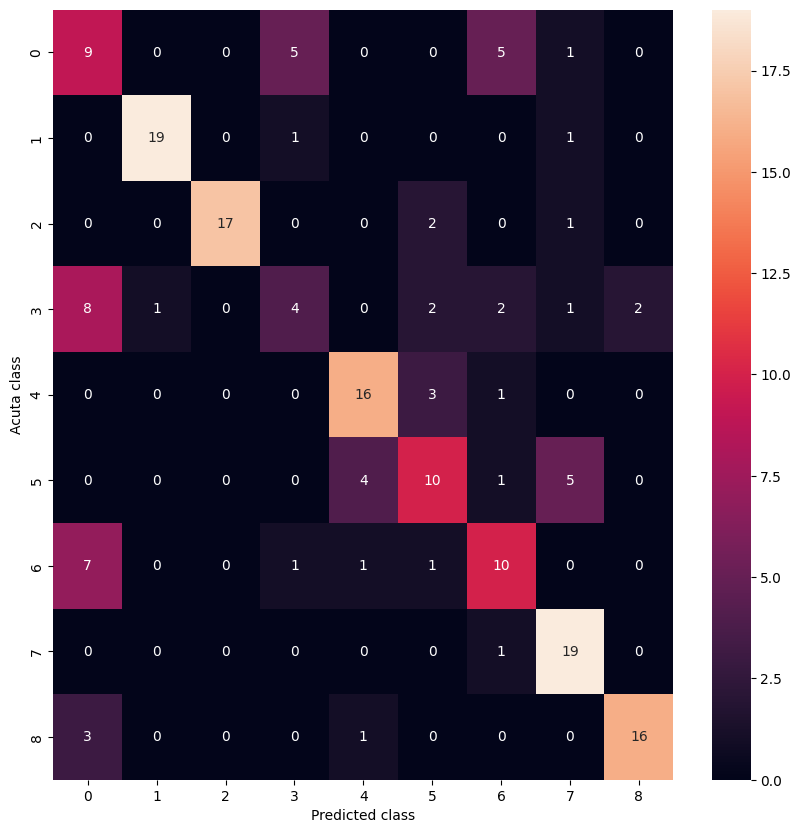

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted class")
plt.ylabel("Acuta class")
plt.show()

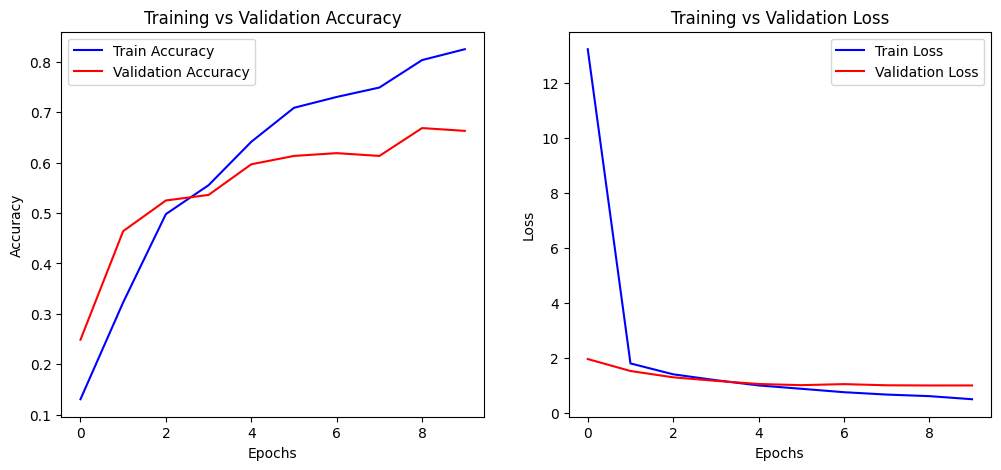

In [45]:
# Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'], label='Train Loss', color='blue')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()